In [11]:
pip install --force-reinstall

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [8]:
pip install --upgrade numpy==1.26.4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

  Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata (12 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install catboost

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.7 MB 1.4 MB/s eta 0:01:13
   ---------------------------------------- 1.0/101.7 MB 2.0 MB/s eta 0:00:51
    --------------------------------------- 1.8/101.7 MB 2.3 MB/s eta 0:00:43
   - -------------------------------------- 2.6/101.7 MB 2.6 MB/s eta 0:00:39
   - -------------------------------------- 3.4/101.7 MB 2.8 MB/s eta 0:00:36
   - -------------------------------------- 4.2/101.7 MB 2.9 MB/s eta 0:00:34
   -- ------------------------------------- 5.2/101.7 MB 3.2 MB/s eta 0:00:31
   -- ----------------------------------

  You can safely remove it manually.
  You can safely remove it manually.


In [6]:
import numpy as np

In [9]:
print(np.__version__)

2.1.1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

##### Preparing X and Y variaiables from the dataset"""

In [4]:
x = df.drop(columns='math_score',axis=1)

In [5]:
x.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  reading score  writing score  
0                    none             72             74  
1               completed             90             88  
2                    none             95             93  
3                    none             57             44  
4                    none             78             75

In [6]:
y = df['math_score']

In [7]:
print("categories in 'gender' variables:  ",end=" ")
print(df["gender"].unique())

print("categories in 'race/ethnicity' variables:  ",end=" ")
print(df["race/ethnicity"].unique())

print("categories in 'parental level of education' variables:  ",end=" ")
print(df["parental_level_of_education"].unique())

print("categories in 'lunch' variables:  ",end=" ")
print(df["lunch"].unique())

print("categories in 'test preparation course' variables:  ",end=" ")
print(df["test_preparation_course"].unique())



categories in 'gender' variables:   ['female' 'male']
categories in 'race/ethnicity' variables:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variables:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variables:   ['standard' 'free/reduced']
categories in 'test preparation course' variables:   ['none' 'completed']


In [8]:
# create column transformer with 3 types of transformers
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer   

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer( 
    [
        ('OneHotEncode',oh_transformer,cat_features),
        ('standardSclaer',numeric_transformer,num_features),
    ]
)


In [9]:
X = preprocessor.fit_transform(x)

In [10]:
X.shape

(1000, 19)

In [11]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [12]:
## separate dataset into train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape


((800, 19), (200, 19))

### Create a evaluate function to give all metrics after model training

In [13]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square


In [14]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "Support Vector Regressor":SVR(),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print("- Root mean squared error: {:.4f}".format(model_train_rmse))
    print("- Mean absolute error: {:.4f}".format(model_train_mae))
    print("- R2 score: {:.4f}".format(model_train_r2))

    print("----------------------------------")

    print("Model performance for test set")
    print("- Root mean squared error: {:.4f}".format(model_test_rmse))
    print("- Mean absolute error: {:.4f}".format(model_test_mae))
    print("- R2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")

Linear Regression
Model performance for training set
- Root mean squared error: 5.3243
- Mean absolute error: 4.2671
- R2 score: 0.8743
----------------------------------
Model performance for test set
- Root mean squared error: 5.3960
- Mean absolute error: 4.2158
- R2 score: 0.8803


Lasso
Model performance for training set
- Root mean squared error: 6.5938
- Mean absolute error: 5.2063
- R2 score: 0.8071
----------------------------------
Model performance for test set
- Root mean squared error: 6.5197
- Mean absolute error: 5.1579
- R2 score: 0.8253


Ridge
Model performance for training set
- Root mean squared error: 5.3233
- Mean absolute error: 4.2650
- R2 score: 0.8743
----------------------------------
Model performance for test set
- Root mean squared error: 5.3904
- Mean absolute error: 4.2111
- R2 score: 0.8806


K-Neighbors Regressor
Model performance for training set
- Root mean squared error: 5.7077
- Mean absolute error: 4.5167
- R2 score: 0.8555
-----------------------

## Results

In [15]:
# Convert the list to a pandas DataFrame
df = pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score'])

# Sort the DataFrame by 'R2_score' in descending order
df = df.sort_values(by=["R2_score"],ascending=False)

print(df)

                 Model Name  R2_score
2                     Ridge  0.880593
0         Linear Regression  0.880345
5   Random Forest Regressor  0.852552
7     CatBoosting Regressor  0.851632
9        AdaBoost Regressor  0.847064
6              XGBRegressor  0.827797
1                     Lasso  0.825320
3     K-Neighbors Regressor  0.783813
4             Decision Tree  0.742211
8  Support Vector Regressor  0.728600


## Linear Regression Model

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 88.03


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

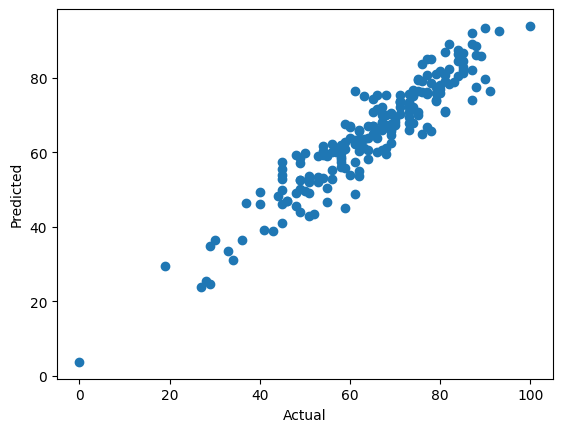

In [17]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

<Axes: xlabel='math score'>

### Differences betweeen Actual and Predicted

In [19]:
pred_df = pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred,'Difference':y_test-y_pred})
pred_df

Actual Value  Predicted Value  Difference
521            91        76.507812   14.492188
737            53        58.953125   -5.953125
740            80        76.960938    3.039062
660            74        76.757812   -2.757812
411            84        87.539062   -3.539062
..            ...              ...         ...
408            52        43.546875    8.453125
332            62        62.031250   -0.031250
208            74        67.976562    6.023438
613            65        67.132812   -2.132812
78             61        62.492188   -1.492188

[200 rows x 3 columns]